Homework

1) Write a function that calculates the mass of NGC 4321.

The data is available here: http://www.astro.yale.edu/cgi-bin/viva/galaxy.cgi?ngc4321 (Download the "Cleaned cube")

Note the different "beam size" compared to NGC 4192. The beam size information is on the webpage of the data.

Use the same distance in Mpc as for NGC 4192.

2) Make a plot of the spectrum of NGC 4321.

3) Make a function (or combine several functions) that plots the moment 0 and the moment 1 map of NGC 4321.

4) Make an overlay of the HI data on an optical image and a UV image (you can use the GALEX near UV data from SkyView for the UV image).

In [ ]:
! pip install reproject
! pip install astroquery
! pip install spectral_cube

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from reproject import reproject_interp

from astroquery.skyview import SkyView
from astroquery.vizier import Vizier

from spectral_cube import SpectralCube

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1) Write a function that calculates the mass of NGC 4321.

In [ ]:
def masscalculator(name):

  # The HI mass of a galaxy:  MHI=2.36×105Sint∗D2  where  Sint  is the integrated HI flux and  D  is the distance to the galaxy in Mpc.
  #1. Integrated Flux
  # First we need the integrated Flux of the galaxy. We only want to integrate the non zero channels
  directory = '/content/drive/My Drive/Colab Notebooks/Data/'

  file = directory+name
  hdul = fits.open(file)

  # Fits files have a header part, which contains the metadata of the file, in this case the details of the observation
  h = hdul[0].header

  # and a data part, which is esentially an N dimensional matrix with numbers
  d = hdul[0].data
  d_2 = d[0,:,:,:]

  #RMS of the data
  rms = np.sqrt(np.mean(d_2**2))

  #Filtering of the data
  d_3 = np.where(d_2 < 5*rms, 0, d_2)
  d_av = np.sum(d_3[:,:,:], axis = 1)
  d_av_3 = np.sum(d_av[:,:], axis = 1)
  spectra = d_av_3[:-3]  
    
    # First we need the integrated Flux of the galaxy
  # We only want to integrate the non zero channels
  spectra_2 = spectra[spectra > 0] 
  chan_width = abs(h['CDELT3'])/1000
  
  x_axis = (np.arange(0,len(spectra))*h['CDELT3']-h['CRVAL3']) / 1000 # we also convert to km/s from m/s
  
  # The units of the data are Jy/beam, so we need to know the beam size (Is it the same)
  bmax = 15.9 # major axis of beam
  bmin = 14.66 # minor axis of beam in arcsec 

  beam_px = (np.pi * (bmax/3600/h['CDELT2']) * (bmin/3600/h['CDELT2'])) / (4 * np.log(2))  # beam size in pixels

  S_int = np.sum(spectra * chan_width / beam_px)  # integrate the spectra in km/s, final unit needs to be in Jy

  #2. Optical Velocity
  # isolate the velocities for the spectral line
  vel_line = x_axis[np.where(spectra > 0)]

  # calculate the line centre
  line_centre = (vel_line[0] + abs(vel_line[-1]))/2 + vel_line[-1]

  #3. Distance
  H_0 = 70 # Hubble constant

  v_opt_line = line_centre # (the middle of the integrated line profile)

  distance_hf = abs(v_opt_line) / H_0   # This is the way to calculate the hubble flow distance to galaxies
  distance = 16 # in MPc - in the case of this galaxy the hubble flow distances are not accurate because the galaxy has a relatively large peculiar motion compared to its systematic velocity
  # for this tutorial we will use 16 MPc for the distance of all Virgo cluster galaxies

  
  
  #4. Mass 
  # Now calculating the HI mass of the galaxy

  m_HI = 2.36 * 10**5 * S_int * distance**2

  print(r'HI mass in units of 10$^{8} M_{sun}$:', m_HI/10**8)
masscalculator('ngc4321.cube.fits')

HI mass in units of 10$^{8} M_{sun}$: 542.479593125


2) Make a plot of the spectrum of NGC 4321.

In [ ]:
def funfile(name):
  directory = '/content/drive/My Drive/Colab Notebooks/Data/'

  file = directory+name
  hdul = fits.open(file)

  # Fits files have a header part, which contains the metadata of the file, in this case the details of the observation
  h = hdul[0].header

  # and a data part, which is esentially an N dimensional matrix with numbers
  d = hdul[0].data
  
  d_2 = d[0,:,:,:]

  #RMS of the data
  rms = np.sqrt(np.mean(d_2**2))

  #Filtering of the data
  d_3 = np.where(d_2 < 5*rms, 0, d_2)

  
  #Plot of the HI spectrum of the galaxy
  ax = plt.subplots(figsize=(8,7))
  plt.plot(d_2[:,128,128])
  plt.title('Spectrum in one pixel', fontsize=15)
  fig,ax = plt.subplots(figsize=(8,7))

  #Plot spectrum without noise
  plt.plot(d_3[:,128,128])
  plt.title('Spectrum in the masked data', fontsize=15)

  # Note the tipical "dubble horn" shape of the profile, this is showing the rotation of the galaxy

  d_av = np.sum(d_3[:,:,:], axis = 1)
  print(d_av.shape)
  d_av_3 = np.sum(d_av[:,:], axis = 1)
  spectra = d_av_3[:-3]  

  x_axis = (np.arange(0,len(spectra))*h['CDELT3']-h['CRVAL3']) / 1000 # we also convert to km/s from m/s

  fig = plt.figure(figsize=(8,7))
  ax = fig.add_subplot(1,1,1)
  plt.plot(x_axis, spectra)  # the last channel if the data cube is bad (with very high noise), so we don't include that in the plot
  ax.set_xlabel('velocity [km / s]', size=18,family='serif')
  ax.set_ylabel('I [Jy / beam]', size=18,family='serif')
  plt.title('Average spectrum of the whole cube', fontsize=15)

(63, 256)


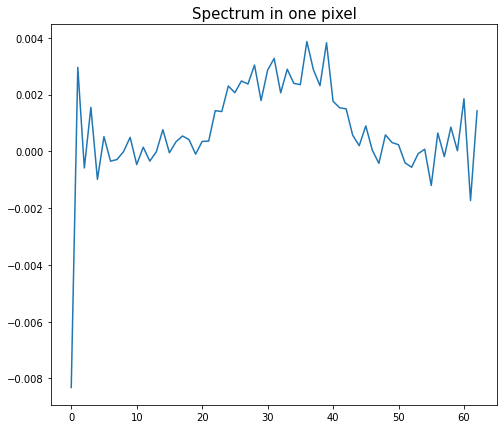

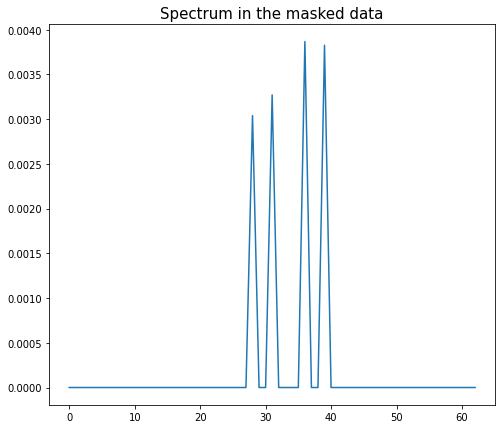

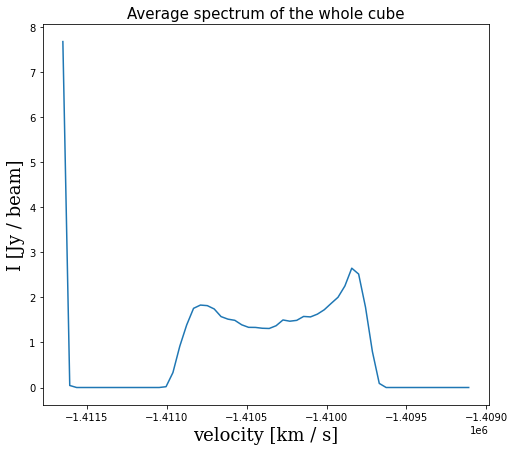

In [ ]:
funfile('ngc4321.cube.fits')

In [ ]:
#@title Default title text
def funfile(name):
  directory = '/content/drive/My Drive/Colab Notebooks/Data/'

  file = directory+name
  hdul = fits.open(file)

  # Fits files have a header part, which contains the metadata of the file, in this case the details of the observation
  h = hdul[0].header

  # and a data part, which is esentially an N dimensional matrix with numbers
  d = hdul[0].data
  d_2 = d[0,:,:,:]

  #RMS of the data
  rms = np.sqrt(np.mean(d_2**2))

  #Filtering of the data
  d_3 = np.where(d_2 < 5*rms, 0, d_2)

  fig = plt.figure(figsize=(11,10))

  d_3_mom0 = np.sum(d_3, axis=0)* abs(h['CDELT3'])/1000  # this is the 0 orderd moment of the data also called moment 0
  
  #Average
  d_av = np.sum(d_3[:,:,:], axis = 1)
  print(d_av.shape)
  d_av_3 = np.sum(d_av[:,:], axis = 1)
  spectra = d_av_3[:-3]  

  x_axis = (np.arange(0,len(spectra))*h['CDELT3']-h['CRVAL3']) / 1000 # we also convert to km/s from m/s

  fig = plt.figure(figsize=(7,5))
  ax = fig.add_subplot(1,1,1)
  plt.plot(x_axis, spectra)  

  ##Mass
  spectra_2 = spectra[spectra > 0] 
  chan_width = abs(h['CDELT3'])/1000

  # The units of the data are Jy/beam, so we need to know the beam size
  bmax = 15.90 # major axis of beam
  bmin = 14.66 # minor axis of beam in arcsec 

  beam_px = (np.pi * (bmax/3600/h['CDELT2']) * (bmin/3600/h['CDELT2'])) / (4 * np.log(2))  # beam size in pixels

  S_int = np.sum(spectra * chan_width / beam_px)  # integrate the spectra in km/s, final unit needs to be in Jy
  print(S_int)
  print(spectra)
  # isolate the velocities for the spectral line
  vel_line = x_axis[np.where(spectra > 0)]
  print(vel_line)

  # calculate the line centre
  line_centre = (vel_line[0] + abs(vel_line[-1]))/2 + vel_line[-1]
  print(line_centre)

  H_0 = 70 # Hubble constant

  v_opt_line = line_centre # (the middle of the integrated line profile)

  distance_hf = abs(v_opt_line) / H_0   # This is the way to calculate the hubble flow distance to galaxies
  distance = 16 # in MPc - in the case of this galaxy the hubble flow distances are not accurate because the galaxy has a relatively large peculiar motion compared to its systematic velocity
  # for this tutorial we will use 16 MPc for the distance of all Virgo cluster galaxies

  print('Comapring hubble flow distance to Virgo cluster distance:', distance_hf, distance)

  # Now calculating the HI mass of the galaxy

  m_HI = 2.36 * 10**5 * S_int * distance**2
  print(r'HI mass in units of $10^{8} M_{sun}$:', m_HI/10**8)


  d_3 = d_2.copy()

  for i in range(len(x_axis)):
      d_3[i,:,:] = x_axis[i] * d_3[i,:,:]

  d_3_mom1 = np.sum(d_3, axis=0)* abs(h['CDELT3'])/1000  # this is the moment 1 map of the data


  plt.imshow(d_3_mom1, cmap = 'RdBu_r')

3) Make a function (or combine several functions) that plots the moment 0 and the moment 1 map of NGC 4321.

In [ ]:
def funfile(name):
  directory = '/content/drive/My Drive/Colab Notebooks/Data/'

  file = directory+name
  hdul = fits.open(file)

  # Fits files have a header part, which contains the metadata of the file, in this case the details of the observation
  h = hdul[0].header

  # and a data part, which is esentially an N dimensional matrix with numbers
  d = hdul[0].data
  d_2 = d[0,:,:,:]

  #RMS of the data
  rms = np.sqrt(np.mean(d_2**2))

  #Filtering of the data
  d_3 = np.where(d_2 < 5*rms, 0, d_2)

  #Moment 0

  d_3_mom0 = np.sum(d_3, axis=0)* abs(h['CDELT3'])/1000  # this is the 0 orderd moment of the data also called moment 0
  fig,ax = plt.subplots(figsize=(8,7))
  plt.imshow(d_3_mom0)
  plt.title('Moment 0', fontsize=15)
  ax.set_xlabel('RA', size=18,family='serif')
  ax.set_ylabel('Dec', size=18,family='serif')
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.tight_layout()

  #Average
  d_av = np.sum(d_3[:,:,:], axis = 1)
  d_av_3 = np.sum(d_av[:,:], axis = 1)
  spectra = d_av_3[:-3]  

  x_axis = (np.arange(0,len(spectra))*h['CDELT3']-h['CRVAL3']) / 1000 # we also convert to km/s from m/s


  ##Moment 1
  d_3 = d_2.copy()

  for i in range(len(x_axis)):
      d_3[i,:,:] = x_axis[i] * d_3[i,:,:]

  d_3_mom1 = np.sum(d_3, axis=0)* abs(h['CDELT3'])/1000  # this is the moment 1 map of the data

  fig,ax = plt.subplots(figsize=(8,7))

  plt.imshow(d_3_mom1, cmap = 'RdBu_r')
  plt.title('Moment 1', fontsize=15)
  ax.set_xlabel('RA', size=18,family='serif')
  ax.set_ylabel('Dec', size=18,family='serif')
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.show()

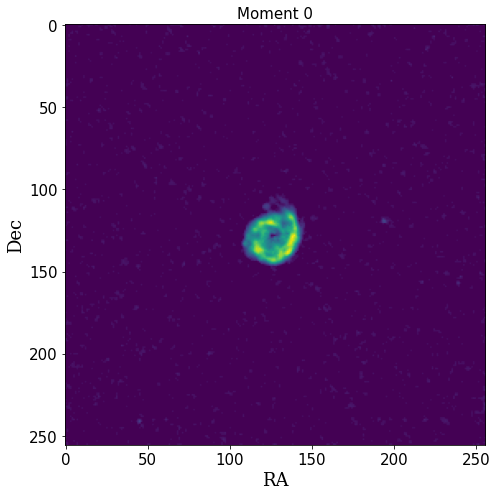

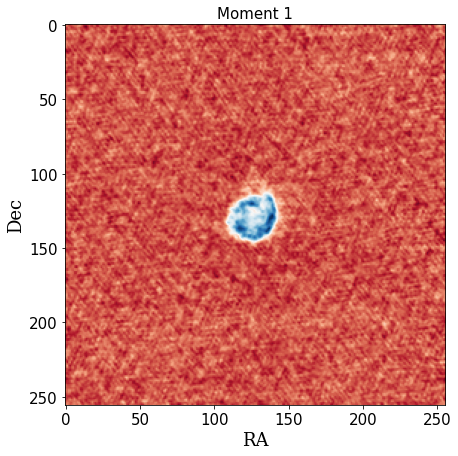

In [ ]:
funfile('ngc4321.cube.fits')

4) Make an overlay of the HI data on an optical image and a UV image (you can use the GALEX near UV data from SkyView for the UV image).

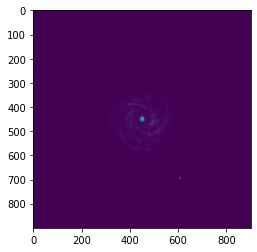

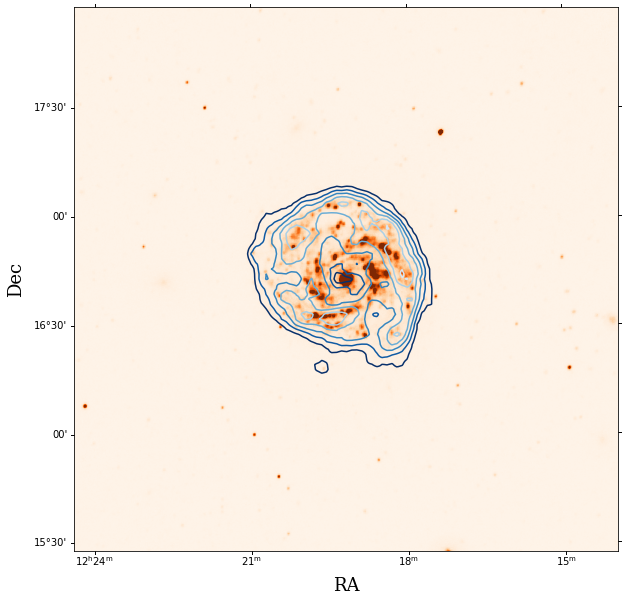

In [ ]:
#1. Coordinates
# saving data in a fits file
directory = '/content/drive/My Drive/Colab Notebooks/Data/'
file = directory+'ngc4321.cube.fits'
hdul = fits.open(file)

# Fits files have a header part, which contains the metadata of the file, in this case the details of the observation
h = hdul[0].header

# and a data part, which is esentially an N dimensional matrix with numbers
d = hdul[0].data
d_2 = d[0,:,:,:]
#RMS of the data
rms = np.sqrt(np.mean(d_2**2))

#Filtering of the data
d_3 = np.where(d_2 < 5*rms, 0, d_2)

#Moment 0
d_3_mom0 = np.sum(d_3, axis=0)* abs(h['CDELT3'])/1000


# first we define some values for the header
wcs_new = WCS(naxis=2)
wcs_new.wcs.cdelt = [h['CDELT1'], h['CDELT2']]
wcs_new.wcs.ctype = [h['CTYPE1'], h['CTYPE2']]
wcs_new.wcs.crval = [h['CRVAL1'], h['CRVAL2']]
wcs_new.wcs.crpix = [h['CRPIX1'], h['CRPIX2']]
header = wcs_new.to_header()

# add the data and the header to an object that can be written into a file
hdul_new = fits.PrimaryHDU(d_3_mom0, header=header)
hdul_new.writeto(directory+'mom0.fits', overwrite=True)

file = directory+'/mom0.fits'
hdul_mom0 = fits.open(file)
h_mom0 = hdul_mom0[0].header
d_mom0 = hdul_mom0[0].data

# get the central coordinate of the image

c = SkyCoord(h_mom0['CRVAL1'], h_mom0['CRVAL2'], unit="deg")


#2. The Optical Image
# this line grabs the image from the remote server
path = SkyView.get_images(position=c.to_string('hmsdms'), width=0.3*u.deg, height=0.3*u.deg, survey=['GALEX Near UV'], pixels=[900,900])

# this line puts the data into a fits image
hdulist_opt = path[0]
d_opt = hdulist_opt[0].data
h_opt = hdulist_opt[0].header


# the dimensions of the data, not the same as the HI image!

# quick look
plt.imshow(d_opt)

#3. Reproyect

# reproject the data onto the same pixel grid
# we are reprojecting the HI data onto the grid of the optical data, since the resolution of the optical data is better
hi_reprojected, footprint = reproject_interp(hdul_mom0, h_opt)

# calculate the rms of the reprojected HI data, to help drawing contours
rms_mom0 = calc_rms(hi_reprojected)

fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=WCS(h_mom0))
ax.imshow(d_opt, cmap='Oranges', vmax=np.percentile(d_opt, 99.8))
ax.contour(hi_reprojected, levels=np.arange(1,8)*rms_mom0, cmap='Blues_r')
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig.savefig(directory+'/ngc4192_mom0_overlay.png', dpi=200)

# Note that the HI disk is very similar in size to the stellar disk

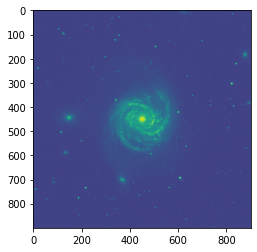

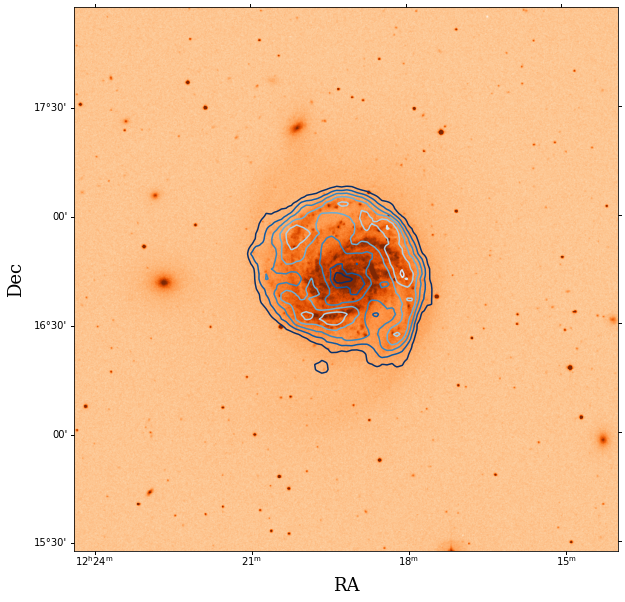

In [ ]:
#1. Coordinates
# get the central coordinate of the image

def calc_rms(x):
    rms = np.sqrt(np.mean(x**2))
    return rms

c = SkyCoord(h_mom0['CRVAL1'], h_mom0['CRVAL2'], unit="deg")


#2. The Optical Image
# this line grabs the image from the remote server
path = SkyView.get_images(position=c.to_string('hmsdms'), width=0.3*u.deg, height=0.3*u.deg, survey=['DSS2 Blue'], pixels=[900,900])

# this line puts the data into a fits image
hdulist_opt = path[0]
d_opt = hdulist_opt[0].data
h_opt = hdulist_opt[0].header


# the dimensions of the data, not the same as the HI image!

# quick look
plt.imshow(d_opt)

#3. Reproyect

# reproject the data onto the same pixel grid
# we are reprojecting the HI data onto the grid of the optical data, since the resolution of the optical data is better
hi_reprojected, footprint = reproject_interp(hdul_mom0, h_opt)

# calculate the rms of the reprojected HI data, to help drawing contours
rms_mom0 = calc_rms(hi_reprojected)

fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=WCS(h_mom0))
ax.imshow(d_opt, cmap='Oranges', vmax=np.percentile(d_opt, 99.8))
ax.contour(hi_reprojected, levels=np.arange(1,8)*rms_mom0, cmap='Blues_r')
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig.savefig(directory+'/ngc4192_mom0_overlay.png', dpi=200)

# Note that the HI disk is very similar in size to the stellar disk